In [1]:
import os
import sys
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import OrderedDict
#import shutil

sys.path.insert(0, os.path.join("..", "..", ".."))

from petroflow import Well, WellBatch, WS, WellDataset
from petroflow.batchflow import L, V

In [2]:
DATASET_PATH = "/notebooks/data/september_dataset/core_photo/*/*"
DEFAULT_LABEL = 'Другое'
THRESHOLD = 80

In [3]:
classes = dict()

def update_coverage_stat(core_lithology, classes):
    for (depth_from, depth_to), formation in core_lithology.iterrows():
        if formation.FORMATION in classes:
            classes[formation.FORMATION] += depth_to - depth_from
        else:
            classes[formation.FORMATION] = depth_to - depth_from
    return classes

In [4]:
ds = WellDataset(path=DATASET_PATH, dirs=True, sort=True)

In [5]:
ppl = (ds.p
     .init_variable('classes', default=dict())
     .has_attr('core_lithology')
     .create_segments('samples')
     .update_coverage_stat(L(pd.concat)(WS('core_lithology').ravel()), V('classes'), save_to=V('classes'))
)

ppl.run(10, n_epochs=1)

In [11]:
filtered_dict = OrderedDict({DEFAULT_LABEL: 0})
mapping = dict()

for key, value in ppl.v('classes').items():
    if value > THRESHOLD:
        filtered_dict[key] = value
        mapping[key] = key
    else:
        filtered_dict[DEFAULT_LABEL] += value
        mapping[key] = DEFAULT_LABEL 

filtered_dict = OrderedDict(sorted(filtered_dict.items(), key=lambda x: x[1]))

<BarContainer object of 20 artists>

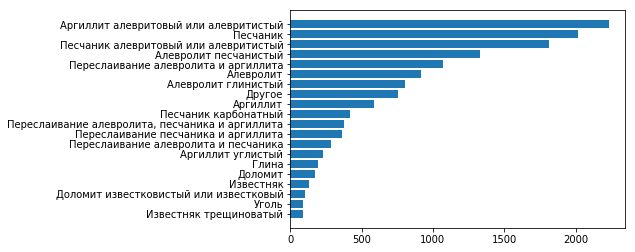

In [12]:
plt.barh(list(filtered_dict.keys()), list(filtered_dict.values()))

In [13]:
for key, value in OrderedDict(sorted(mapping.items(), reverse=True, key=lambda x: ppl.v('classes')[x[0]])).items():
    if value == DEFAULT_LABEL:
        print('{:40}: {:5.2f} m'.format(key, ppl.v('classes')[key]))

Песчаник глинистый                      : 75.46 m
Фундамент                               : 71.23 m
Переслаивание песчаника и глины         : 63.10 m
Кремнисто-глинистая порода              : 63.04 m
Доломит глинистый                       : 51.09 m
не опр                                  : 46.61 m
Доломит трещиноватый                    : 46.14 m
Известняк доломитовый                   : 38.55 m
Аргиллит сидеритизированный             : 34.84 m
Переслаивание алевролита и глины        : 34.63 m
Аргиллит битуминозный                   : 30.71 m
Глинисто-карбонатная порода             : 28.63 m
Ангидрит-доломитовая порода             : 24.09 m
Доломит битуминозный                    : 22.45 m
Аргиллит известковистый или известковый : 19.14 m
Кора выветривания                       : 17.88 m
Песчаник гравийный                      : 13.16 m
Конгломерат                             : 12.26 m
Гранит                                  : 10.83 m
Галит                                   :  8.33 m
